# Book.csv

In [32]:
import mlxtend

In [33]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [34]:
book=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/association%20rules/book.csv')

In [35]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Apriori Algorithm with 10% support and 90% confidence

In [36]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets.head()

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules
rules.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [38]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
20,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
21,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


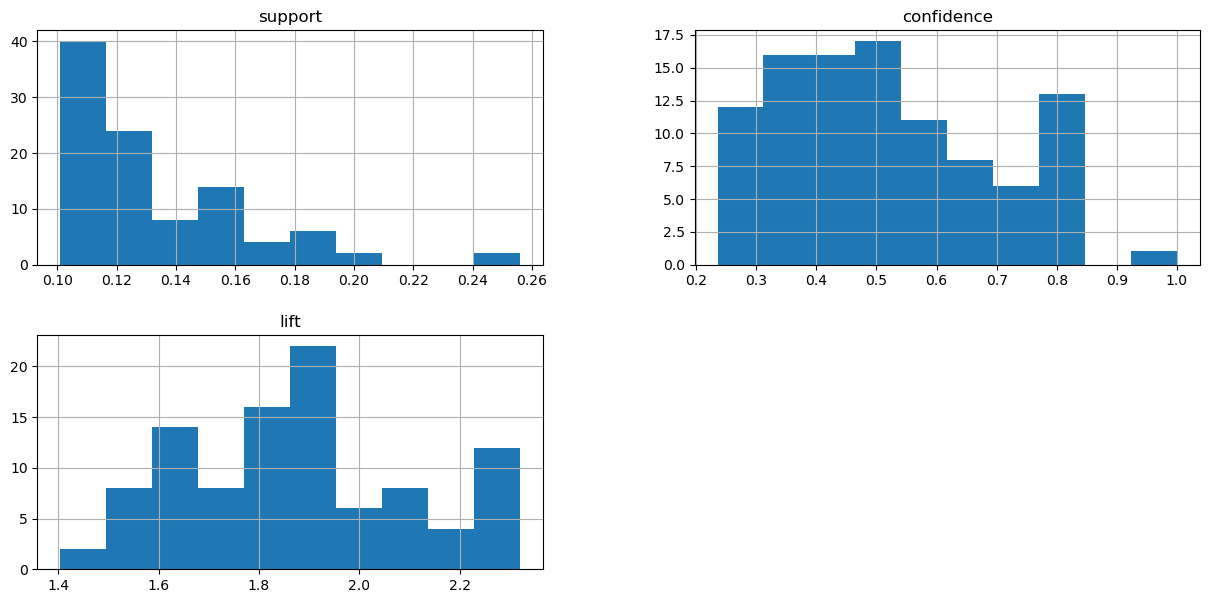

In [39]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

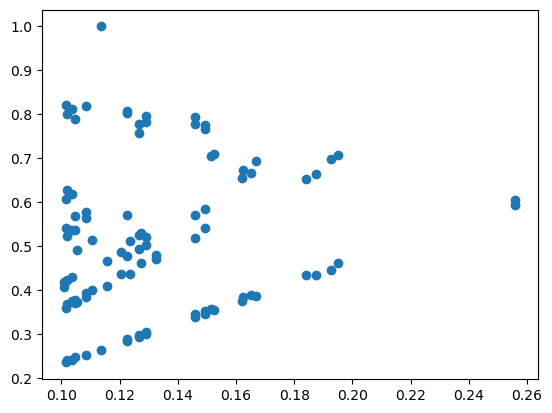

In [40]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\vacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


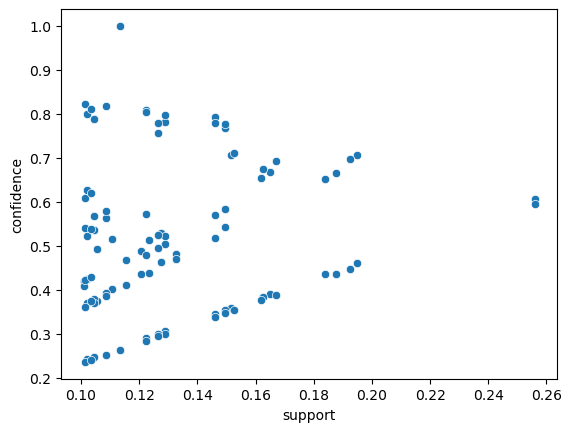

In [41]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

# Apriori Algorithm with 5% support and 80% confidence


In [42]:
frequent_itemsets1=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets1

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, YouthBks, CookBks, DoItYBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(GeogBks, ArtBks, CookBks, DoItYBks)"
98,0.0510,"(ChildBks, GeogBks, CookBks, YouthBks, DoItYBks)"


In [43]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.8)
rules1
rules1.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
509,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
512,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
511,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [44]:
rules1.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
26,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
27,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


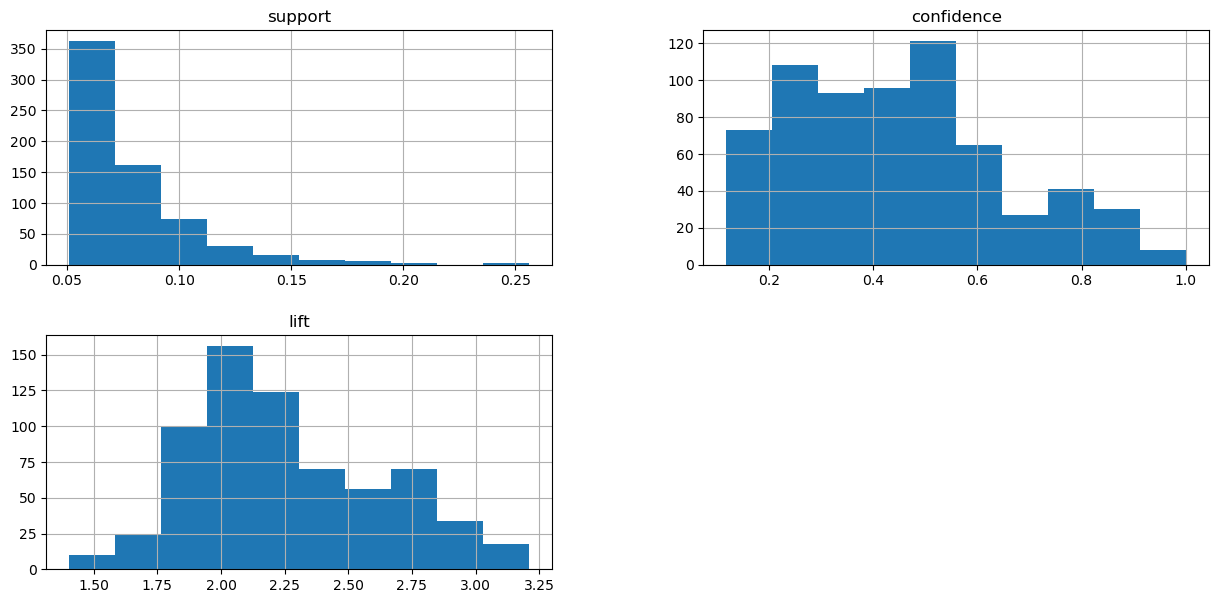

In [45]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

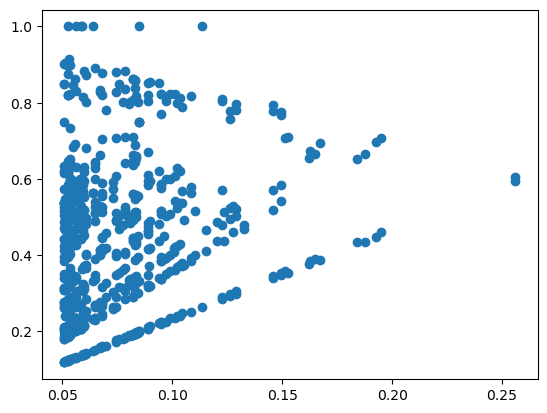

In [46]:
import matplotlib.pyplot as plt

plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

C:\Users\vacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


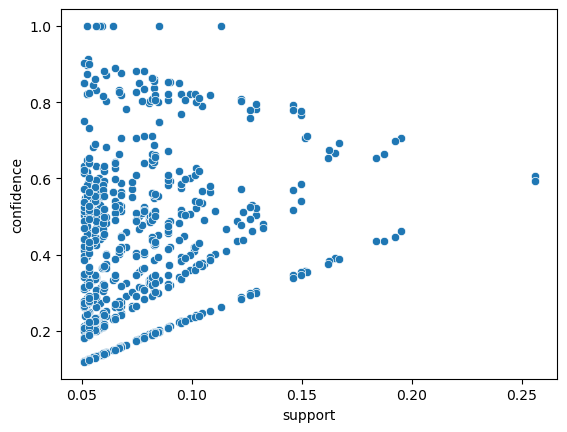

In [47]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules1,)

plt.show()

# Association rules for 20% support and 60% confidence

In [48]:
# With 20% Support
frequent_itemsets2=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets2

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [49]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [50]:
rules2.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


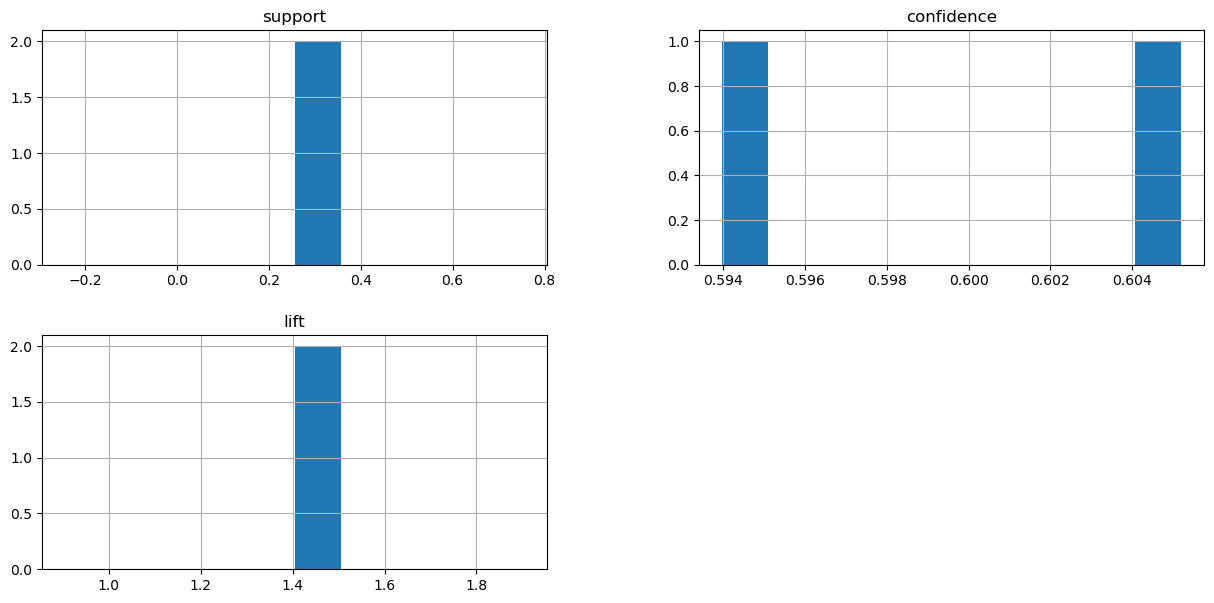

In [51]:
import matplotlib.pyplot as plt
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

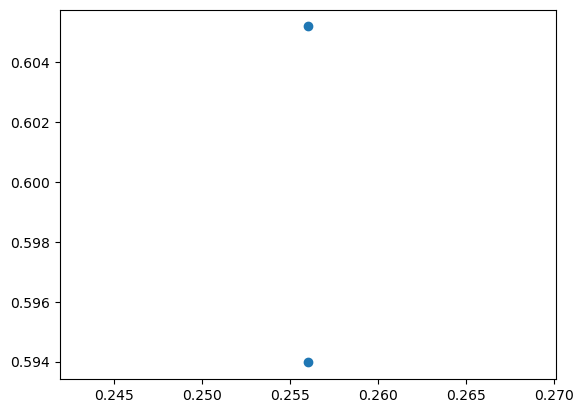

In [52]:
import matplotlib.pyplot as plt

plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

C:\Users\vacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


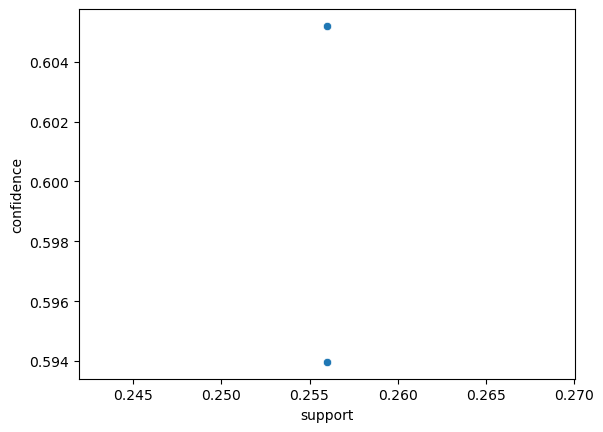

In [53]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules2,)

plt.show()

# my_movies.csv

In [1]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/association%20rules/my_movies.csv')

In [3]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies1=pd.get_dummies(movies)

In [5]:
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Association rules for 20% support and 60% confidence¶

In [6]:
frequent_itemsets = apriori(movies1,min_support=0.2,use_colnames=True)
frequent_itemsets

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Gladiator, Sixth Sense, V3_Sixth ..."
77,0.4,"(V2_Patriot, Gladiator, Sixth Sense, V3_Sixth ..."
78,0.4,"(V2_Patriot, Sixth Sense, V3_Sixth Sense, V1_G..."
79,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, V1_Gla..."


In [8]:
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=0.6)
rules
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
176,"(V4_Green Mile, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
212,(Sixth Sense),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
101,(Sixth Sense),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
233,"(V1_Gladiator, V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [9]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
77,(Sixth Sense),"(V2_Patriot, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
233,"(V1_Gladiator, V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
47,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
240,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
212,(Sixth Sense),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
52,"(V1_Gladiator, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
53,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
58,"(V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
205,"(V2_Patriot, Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


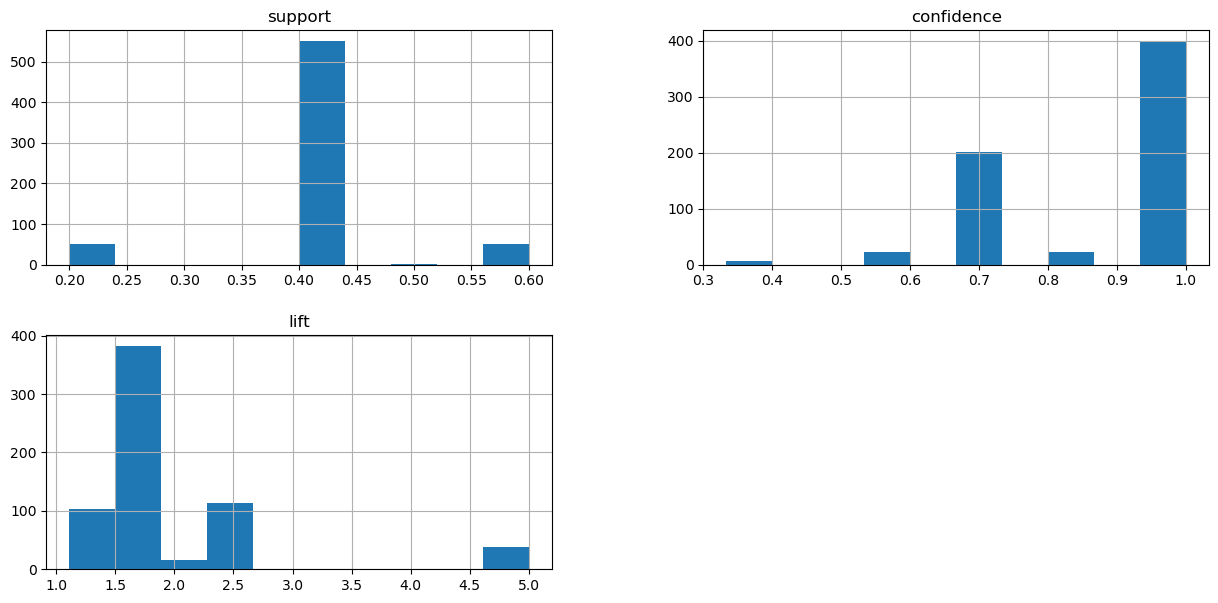

In [10]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

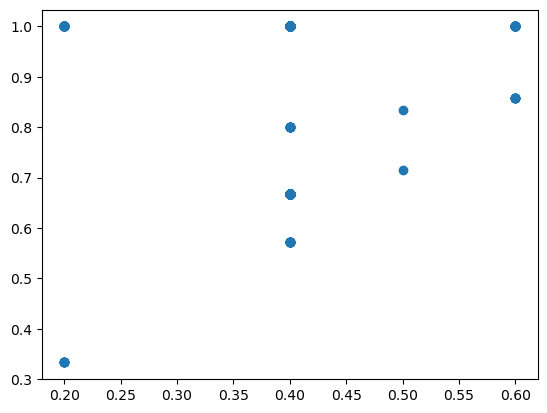

In [11]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

# Apriori Algorithm with 5% support and 80% confidence

In [13]:
frequent_itemsets1 = apriori(movies1, min_support=0.05, use_colnames=True)
frequent_itemsets1

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, V3_H..."
1393,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, LOTR..."
1394,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, LOTR..."
1395,0.1,"(Green Mile, V1_Sixth Sense, LOTR2, V3_Harry P..."


In [14]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.8)
rules1
rules1.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32112,"(V3_Harry Potter1, Harry Potter1, LOTR2, LOTR1)","(Sixth Sense, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
52640,"(V4_Green Mile, Green Mile, V5_LOTR2, V2_LOTR1)","(Sixth Sense, LOTR1, LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33414,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, V5_LOTR2, V2_LOTR1, V4_...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(Sixth Sense, V5_LOTR2)","(LOTR2, Harry Potter1, LOTR1, V2_LOTR1, V4_Gre...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(Sixth Sense, V2_LOTR1)","(LOTR2, Harry Potter1, LOTR1, V5_LOTR2, V4_Gre...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
259,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [15]:
rules1.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
259,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
258,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
1639,"(V4_Green Mile, Green Mile)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.00
1636,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.00


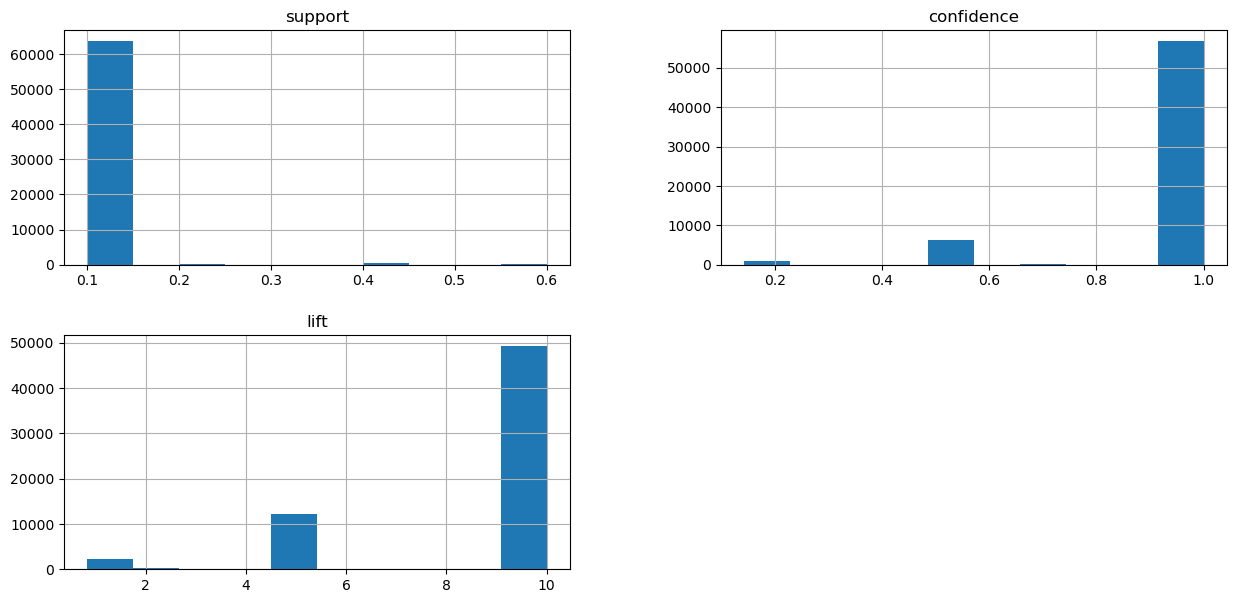

In [16]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

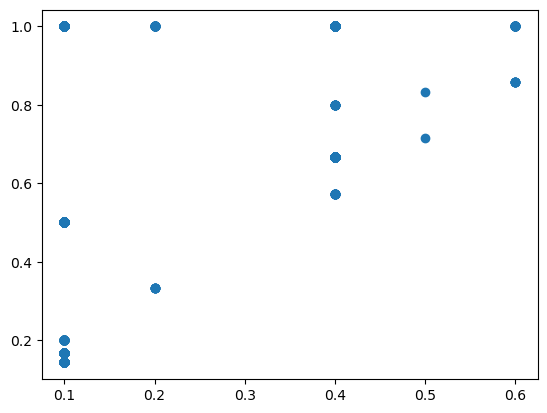

In [17]:
import matplotlib.pyplot as plt

plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

# Apriori Algorithm with 10% support and 90% confidence

In [19]:
frequent_itemsets2 = apriori(movies1, min_support=0.1, use_colnames=True)
frequent_itemsets2

C:\Users\vacha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, V3_H..."
1393,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, LOTR..."
1394,0.1,"(Green Mile, V1_Sixth Sense, Sixth Sense, LOTR..."
1395,0.1,"(Green Mile, V1_Sixth Sense, LOTR2, V3_Harry P..."


In [21]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules2
rules2.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
176,"(V4_Green Mile, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
212,(Sixth Sense),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
101,(Sixth Sense),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
233,"(V1_Gladiator, V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [22]:
rules2.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
77,(Sixth Sense),"(V2_Patriot, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
233,"(V1_Gladiator, V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
47,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
240,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
212,(Sixth Sense),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
52,"(V1_Gladiator, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
53,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
58,"(V2_Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
205,"(V2_Patriot, Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


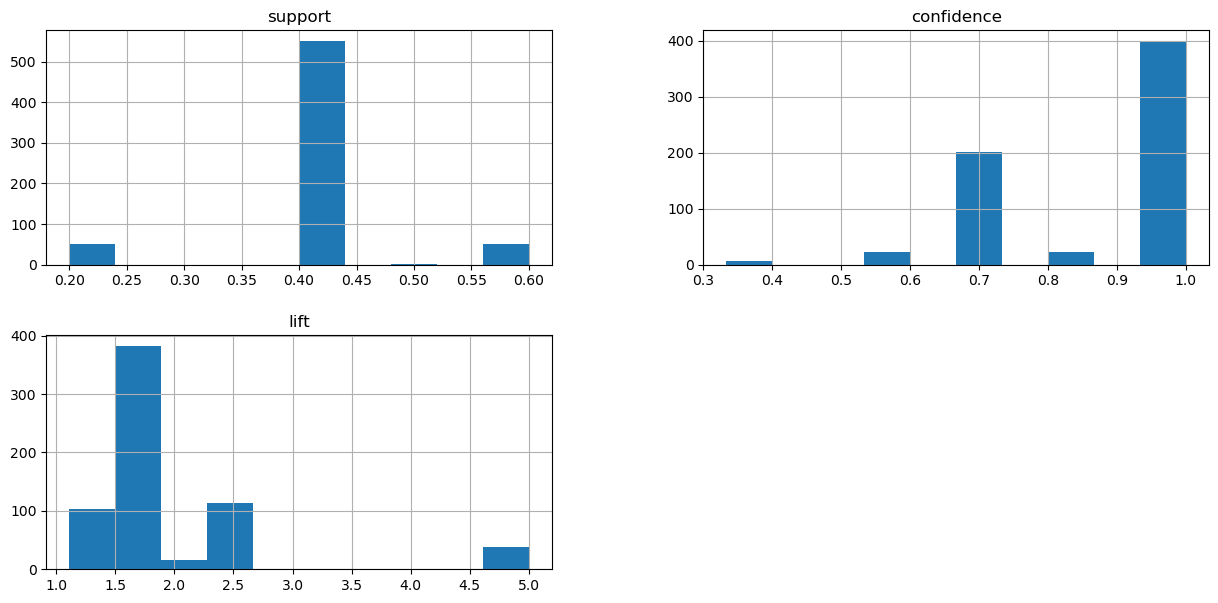

In [23]:
import matplotlib.pyplot as plt
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

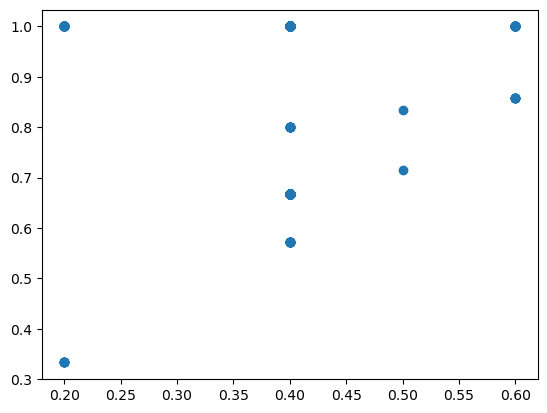

In [24]:
import matplotlib.pyplot as plt

plt.scatter(rules2['support'], rules2['confidence'])
plt.show()